In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('../../data/Heart Disease Dataset.csv')

In [37]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [39]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


([<matplotlib.patches.Wedge at 0x1d5b2ea6640>,
 [Text(-0.1604426989002982, 1.1387528881937419, 'Sick'),
  Text(0.16044280551803777, -1.1387528731720071, 'Not sick')],
 [Text(-0.07673346469144694, 0.5446209465274416, '54.5%'),
  Text(0.0767335156825398, -0.5446209393431338, '45.5%')])

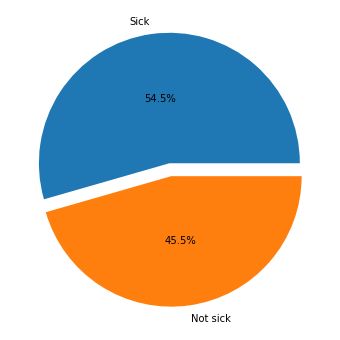

In [40]:
pie, ax = plt.subplots(figsize=[10, 6])
plt.pie(x = data['target'].value_counts(), autopct='%.1f%%', explode=[0.05] * 2, labels=['Sick', 'Not sick'], pctdistance=0.5)

<AxesSubplot:>

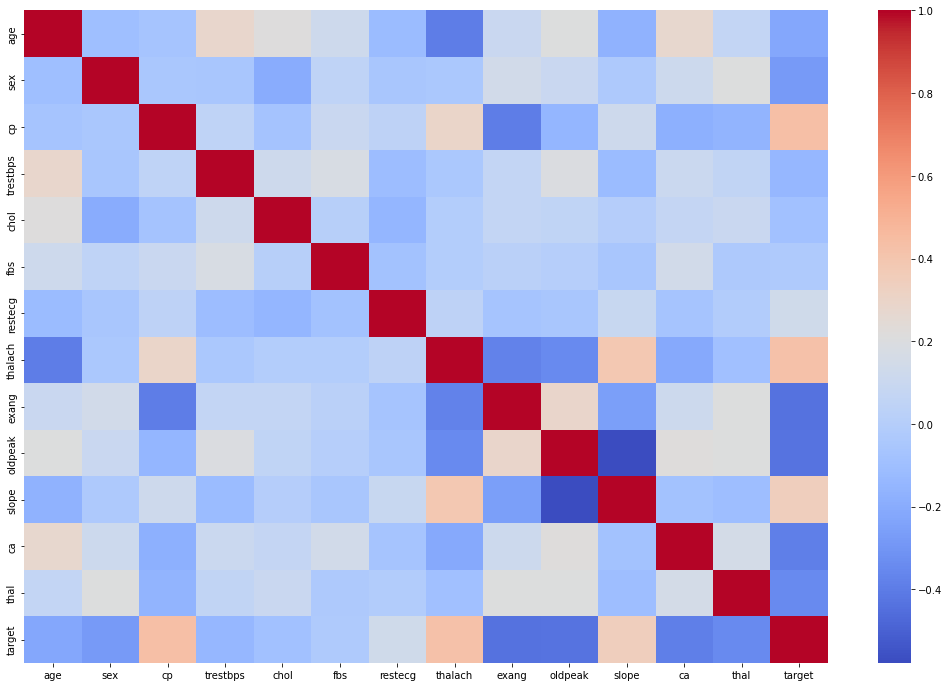

In [41]:
fig = plt.figure(figsize=(18, 12))
ax = plt.subplot(1, 1, 1)
sns.heatmap(data.corr(), ax=ax, cmap='coolwarm')

[[ 0.94266072  0.45967892 -0.94055976]
 [ 0.83536654  0.66947099 -0.04341099]
 [ 0.346154    0.89368851  0.87733407]]


<AxesSubplot:>

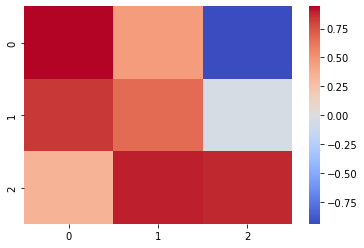

In [42]:
ndata = np.random.uniform(-1, 1, (3, 3))
print(ndata)
sns.heatmap(ndata, center=0, cmap='coolwarm')

In [43]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [49]:
dataframe = pd.get_dummies(data, columns=['sex'])
print(dataframe)

     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0     63   3       145   233    1        0      150      0      2.3      0   
1     37   2       130   250    0        1      187      0      3.5      0   
2     41   1       130   204    0        0      172      0      1.4      2   
3     56   1       120   236    0        1      178      0      0.8      2   
4     57   0       120   354    0        1      163      1      0.6      2   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
298   57   0       140   241    0        1      123      1      0.2      1   
299   45   3       110   264    0        1      132      0      1.2      1   
300   68   0       144   193    1        1      141      0      3.4      1   
301   57   0       130   131    0        1      115      1      1.2      1   
302   57   1       130   236    0        0      174      0      0.0      1   

     ca  thal  target  sex_0  sex_1  
0     0     1       1    

In [52]:
y_data = dataframe['target']
x_data = dataframe.drop(columns='target')

In [61]:
scaler = StandardScaler()
scaler.fit(x_data)
x_data = scaler.transform(x_data)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=33)
print(len(x_train), len(x_test))

212 91


In [78]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

clf.score(x_train, y_train)

0.8537735849056604

In [77]:
clf.score(x_test, y_test)

0.8461538461538461

In [80]:
y_predit = clf.predict(x_test)

print(classification_report(y_test, y_predit))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        50
           1       0.78      0.93      0.84        41

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.86      0.85      0.85        91

